# Medical Appointment No Shows Capstone

## 3. EXPLORATORY DATA ANALYSIS

> “Exploratory data analysis can never be the whole story, but nothing else can serve as a foundation stone—as the first step.” - John Tukey


-  Developing a deeper understanding of the model development data set and preparing to develop a solid model.

In [312]:
#Import necessary libraries
import pandas as pd
import numpy as np

# Plotting modules
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import seaborn as sns

# Analysing datetime
from datetime import datetime as dt

# File system manangement
import os,sys

# Suppress warnings 
import warnings
warnings.filterwarnings('ignore')

#Interactive Shell
from IPython.core.interactiveshell import InteractiveShell  
InteractiveShell.ast_node_interactivity = "all"

#Pandas profiling
from pandas_profiling import ProfileReport

%matplotlib inline

In [313]:
path = 'data/wrangle_csv.csv'
df = pd.read_csv(path, index_col=None, parse_dates=["ScheduledDay","AppointmentDay"])
df.loc[0:1000:100].head()

Gender        ScheduledDay      AppointmentDay  Age     Neighborhood  \
0        F 2016-04-29 18:38:08 2016-04-29 18:38:08   62  JARDIM DA PENHA   
100      F 2016-04-12 15:47:45 2016-04-29 00:00:00   20           BONFIM   
200      M 2016-04-29 09:51:36 2016-04-29 09:51:36   70           CENTRO   
300      F 2016-04-29 13:45:04 2016-04-29 13:45:04   32       ANDORINHAS   
400      M 2016-04-27 09:22:00 2016-04-29 00:00:00   36      MARIA ORTIZ   

     Scholarship  Hypertension  Diabetes  Alcoholism  Handicap  SMSSent  \
0              0             1         0           0         0        0   
100            0             0         0           0         0        1   
200            0             1         0           0         0        0   
300            0             0         0           0         0        0   
400            0             0         0           0         0        0   

    NoShow  WaitingDays ScheduledTime  ScheduledHour ScheduledDayWeekDay  \
0       No            0      18:38:08             18              Friday   
100     No           16      15:47:45             15             Tuesday   
200     No            0      09:51:36              9              Friday   
300     No            0      13:45:04             13              Friday   
400     No            1      09:22:00              9           Wednesday   

    AppointmentDayWeekName ScheduledDayMonthName AppointmentDayMonthName  
0                   Friday                 April                   April  
100                 Friday                 April                   April  
200                 Friday                 April                   April  
300                 Friday                 April                   April  
400                 Friday                 April                   April

In [314]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110517 entries, 0 to 110516
Data columns (total 19 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   Gender                   110517 non-null  object        
 1   ScheduledDay             110517 non-null  datetime64[ns]
 2   AppointmentDay           110517 non-null  datetime64[ns]
 3   Age                      110517 non-null  int64         
 4   Neighborhood             110517 non-null  object        
 5   Scholarship              110517 non-null  int64         
 6   Hypertension             110517 non-null  int64         
 7   Diabetes                 110517 non-null  int64         
 8   Alcoholism               110517 non-null  int64         
 9   Handicap                 110517 non-null  int64         
 10  SMSSent                  110517 non-null  int64         
 11  NoShow                   110517 non-null  object        
 12  WaitingDays     

In [315]:
df.describe(include="all")

Gender         ScheduledDay       AppointmentDay            Age  \
count   110517               110517               110517  110517.000000   
unique       2               103540                36739            NaN   
top          F  2016-05-06 07:09:54  2016-06-06 00:00:00            NaN   
freq     71830                   24                 3073            NaN   
first      NaN  2015-11-10 07:13:56  2016-04-29 00:00:00            NaN   
last       NaN  2016-06-08 20:07:23  2016-06-08 20:07:23            NaN   
mean       NaN                  NaN                  NaN      37.084204   
std        NaN                  NaN                  NaN      23.103250   
min        NaN                  NaN                  NaN       0.000000   
25%        NaN                  NaN                  NaN      18.000000   
50%        NaN                  NaN                  NaN      37.000000   
75%        NaN                  NaN                  NaN      55.000000   
max        NaN                  NaN                  NaN     100.000000   

          Neighborhood    Scholarship   Hypertension       Diabetes  \
count           110517  110517.000000  110517.000000  110517.000000   
unique              80            NaN            NaN            NaN   
top     JARDIM CAMBURI            NaN            NaN            NaN   
freq              7717            NaN            NaN            NaN   
first              NaN            NaN            NaN            NaN   
last               NaN            NaN            NaN            NaN   
mean               NaN       0.098274       0.197255       0.071871   
std                NaN       0.297687       0.397928       0.258276   
min                NaN       0.000000       0.000000       0.000000   
25%                NaN       0.000000       0.000000       0.000000   
50%                NaN       0.000000       0.000000       0.000000   
75%                NaN       0.000000       0.000000       0.000000   
max                NaN       1.000000       1.000000       1.000000   

           Alcoholism       Handicap        SMSSent  NoShow    WaitingDays  \
count   110517.000000  110517.000000  110517.000000  110517  110517.000000   
unique            NaN            NaN            NaN       2            NaN   
top               NaN            NaN            NaN      No            NaN   
freq              NaN            NaN            NaN   88203            NaN   
first             NaN            NaN            NaN     NaN            NaN   
last              NaN            NaN            NaN     NaN            NaN   
mean         0.030403       0.022214       0.321046     NaN       9.532588   
std          0.171693       0.161443       0.466880     NaN      15.027832   
min          0.000000       0.000000       0.000000     NaN       0.000000   
25%          0.000000       0.000000       0.000000     NaN       0.000000   
50%          0.000000       0.000000       0.000000     NaN       3.000000   
75%          0.000000       0.000000       1.000000     NaN      14.000000   
max          1.000000       4.000000       1.000000     NaN     178.000000   

       ScheduledTime  ScheduledHour ScheduledDayWeekDay  \
count         110517  110517.000000              110517   
unique         37109            NaN                   6   
top         07:09:54            NaN             Tuesday   
freq              31            NaN               26166   
first            NaN            NaN                 NaN   
last             NaN            NaN                 NaN   
mean             NaN      10.774596                 NaN   
std              NaN       3.216266                 NaN   
min              NaN       6.000000                 NaN   
25%              NaN       8.000000                 NaN   
50%              NaN      10.000000                 NaN   
75%              NaN      13.000000                 NaN   
max              NaN      21.000000                 NaN   

       AppointmentDayWeekName ScheduledDay

___

In [450]:
pd.DataFrame(df.NoShow.value_counts(normalize=True))

NoShow
No   0.798094
Yes  0.201906

In [451]:
pd.DataFrame( df.groupby('NoShow').agg([np.mean,'count']) )

Age        Scholarship        Hypertension         Diabetes  \
             mean  count        mean  count         mean  count      mean   
NoShow                                                                      
No      37.787297  88203    0.093908  88203     0.204392  88203  0.073841   
Yes     34.305010  22314    0.115533  22314     0.169042  22314  0.064085   

              Alcoholism         Handicap          SMSSent        WaitingDays  \
        count       mean  count      mean  count      mean  count        mean   
NoShow                                                                          
No      88203   0.030418  88203  0.022732  88203  0.291339  88203    8.171820   
Yes     22314   0.030340  22314  0.020167  22314  0.438469  22314   14.911446   

              ScheduledHour         
        count          mean  count  
NoShow                              
No      88203     10.676440  88203  
Yes     22314     11.162589  22314

#  BUILD DATA PROFILES — PLOTS AND TABLES

# Distribution Plots

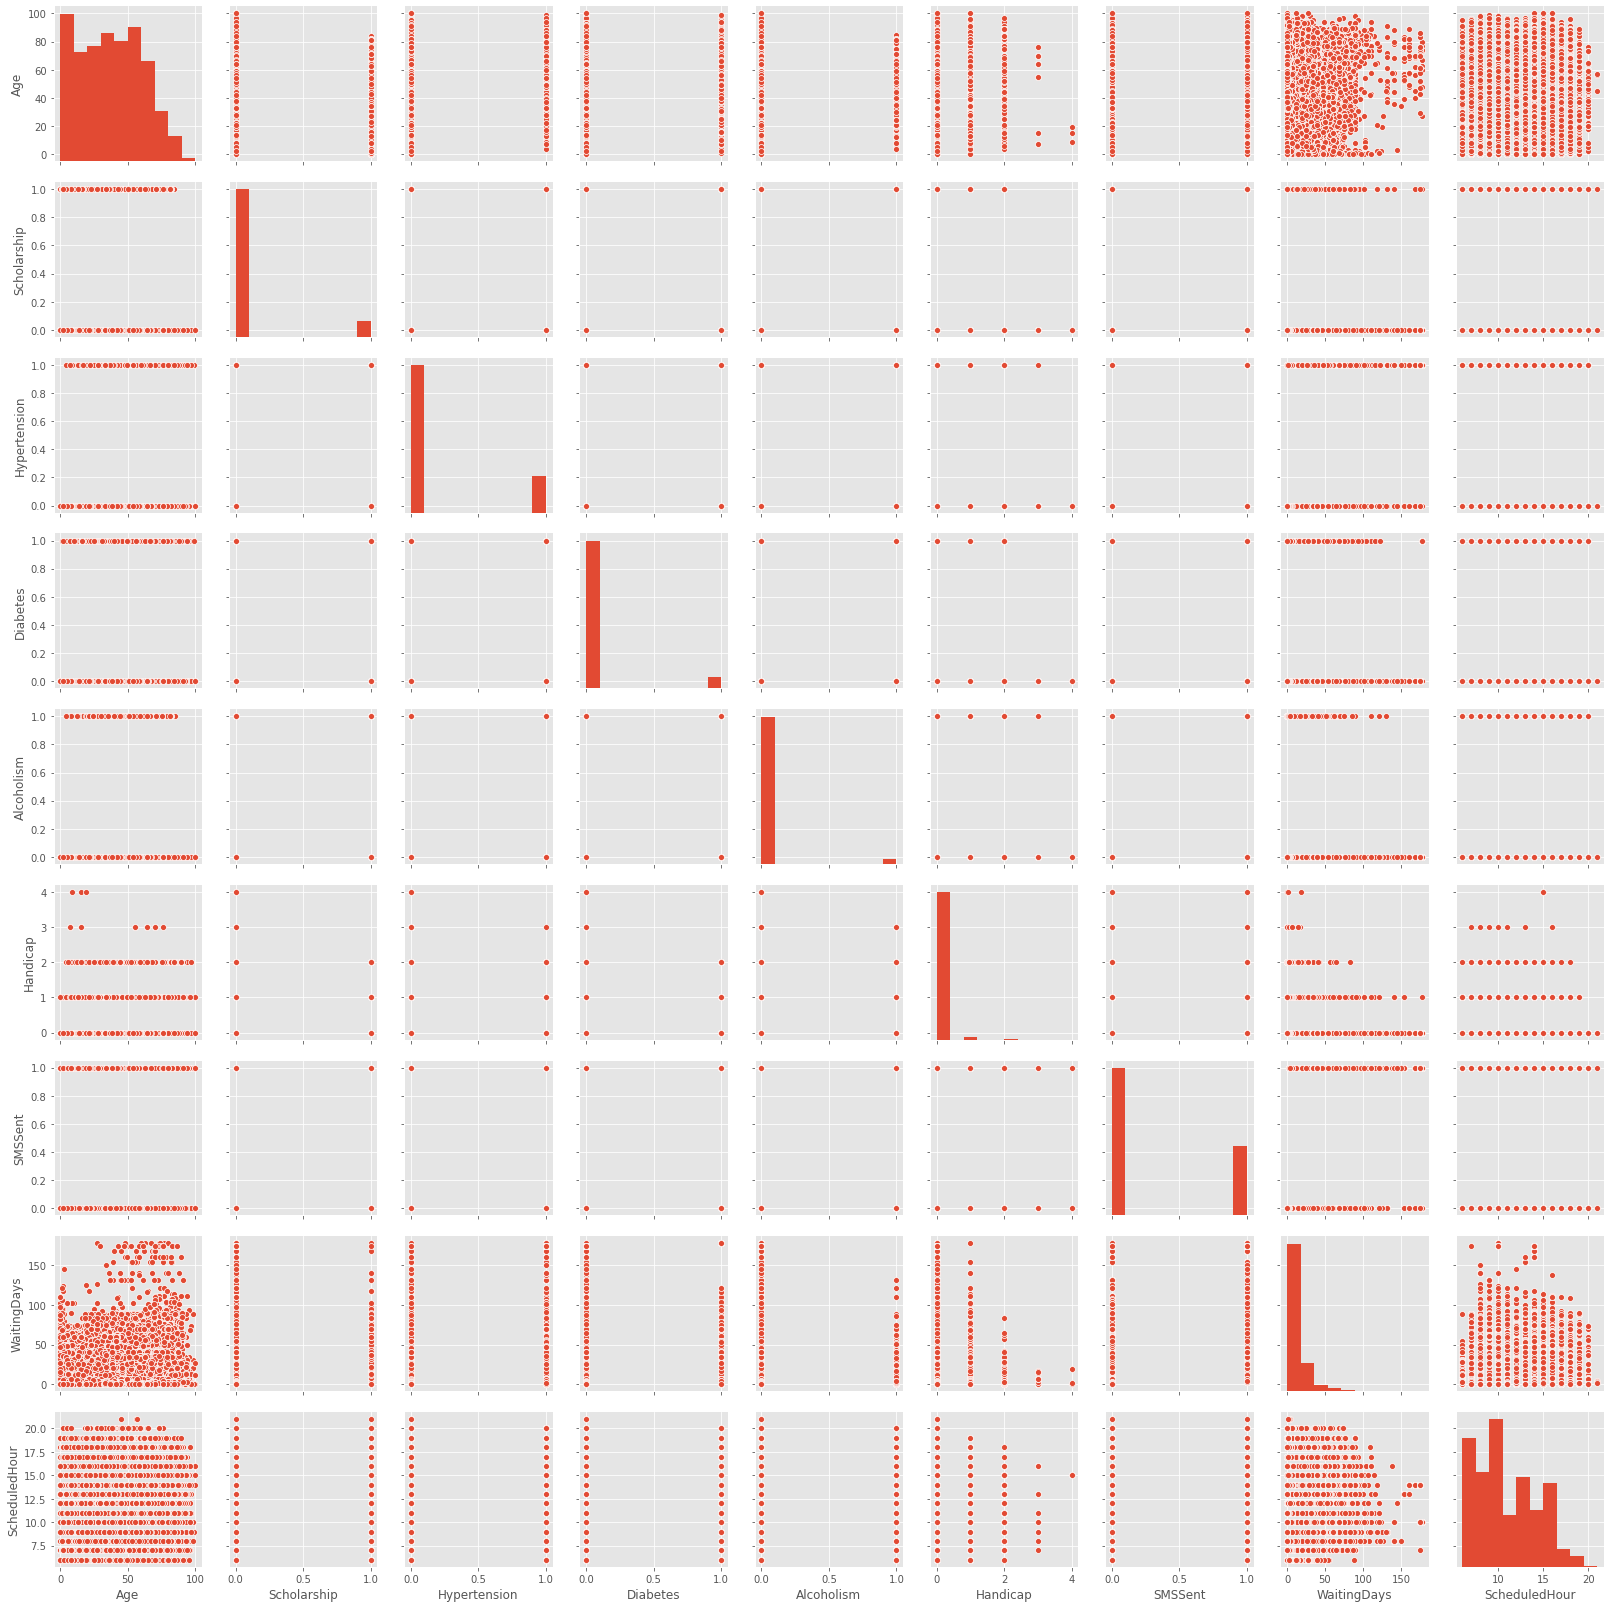

In [307]:
sns.pairplot(df)

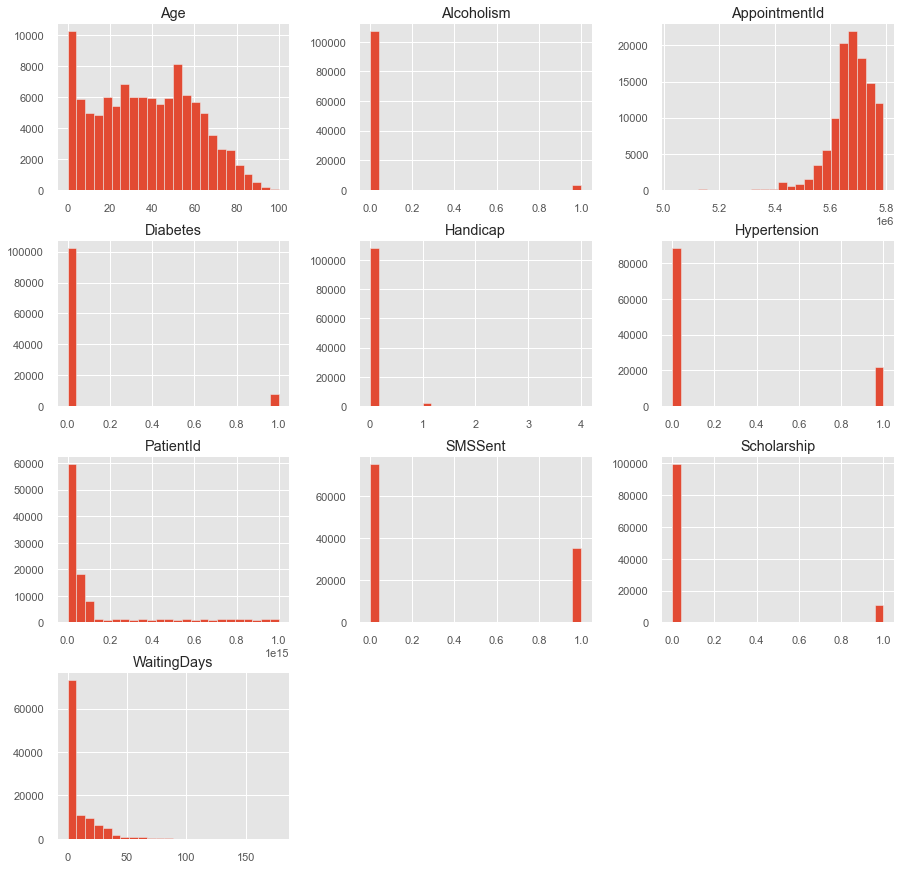

In [146]:
hist = df.hist(bins = 24, figsize = (15,15))

___

___

### Patient's Age

<AxesSubplot:>

<AxesSubplot:xlabel='Age'>

<AxesSubplot:>

<AxesSubplot:xlabel='Age'>

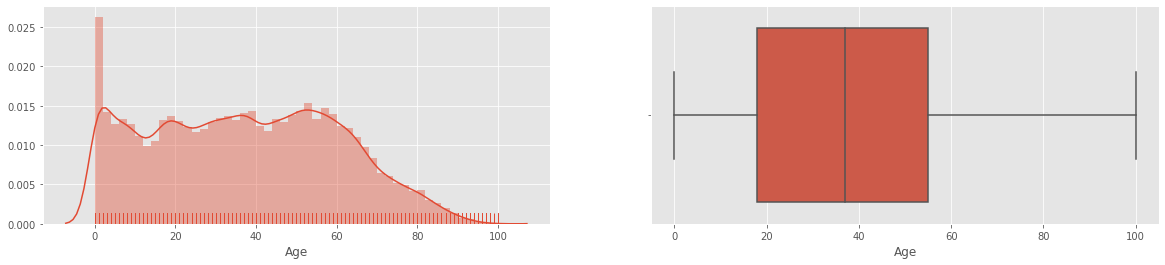

In [83]:
f = plt.figure(figsize=(20,4))
f.add_subplot(1,2,1)

sns.distplot(df['Age'], 
             kde=True, 
             rug=True, 
             bins=50)

f.add_subplot(1,2,2)
sns.boxplot(df['Age'])

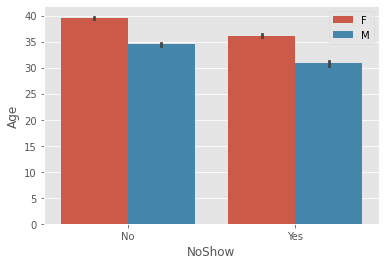

In [240]:
g = sns.barplot(x='NoShow',
            y='Age',
            hue="Gender",
            data=df)

_= plt.legend(loc='upper right')

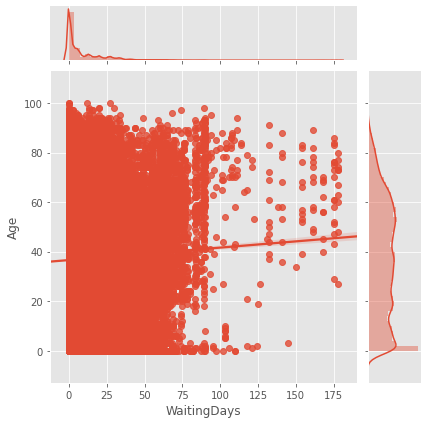

In [84]:
sns.jointplot(x="WaitingDays", 
              y="Age",
              kind="reg", #kind='hex','reg','kde'
              data=df) 

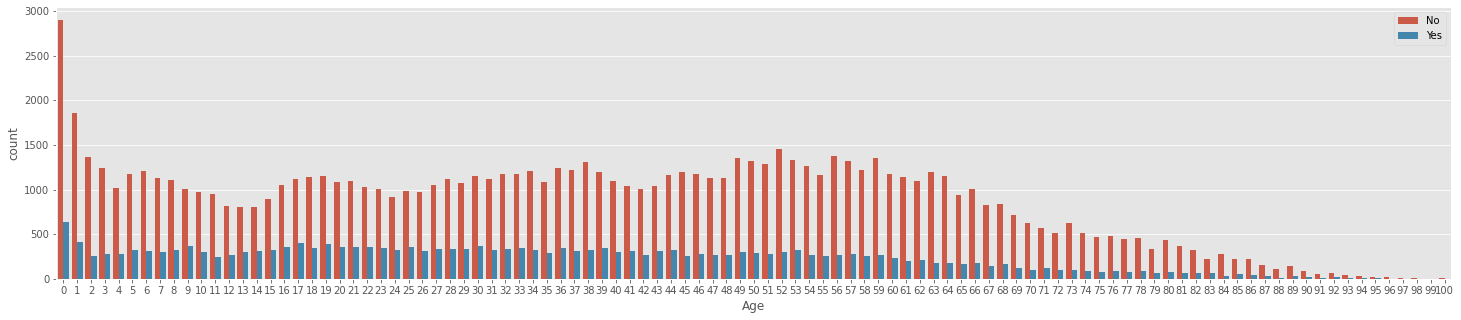

<Figure size 1440x360 with 0 Axes>

In [432]:
_= plt.figure(figsize=(25,5))
g = sns.countplot(x='Age',
            hue="NoShow",
            data=df)

_= plt.legend(loc='upper right')
_= plt.show()
_= plt.figure(figsize=(20,5))

### Empirical Cumulative Distribution Function


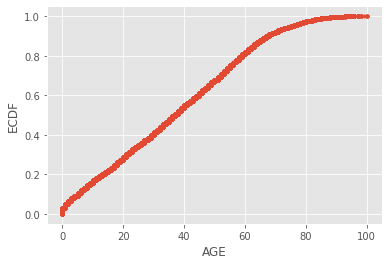

In [82]:
def ecdf(data):

    n = len(data)
    x = np.sort(data)
    y = np.arange(1,n+1)/n
    
    return x,y

b = df['Age']

xa, ye = ecdf(b)

# Generate plot
_= plt.plot(xa, ye, marker='.', linestyle='none')

# Label the axes
_= plt.ylabel('ECDF')
_= plt.xlabel('AGE')

# Display the plot
plt.show()

# Categorical Plots

## Number of Patients who didn't Show Up

[Text(0.5, 0, 'No Shows'), Text(0, 0.5, 'Number of Patients')]

Number of patients that showed up:  88203
Number of patients who didn't show up   22314


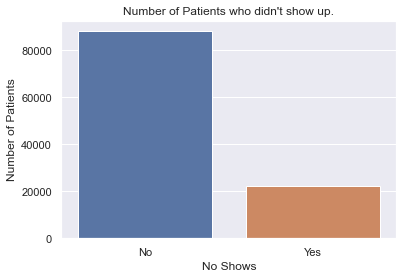

In [452]:
sns.set()
ax = sns.countplot(x='NoShow', data=df)

_= plt.title("Number of Patients who didn't show up.")
ax.set(xlabel='No Shows', 
       ylabel='Number of Patients')

N, Y = df.NoShow.value_counts()
print("Number of patients that showed up: ", N)
print("Number of patients who didn't show up  ", Y)

### Who Scheduled the most Appointments?

<AxesSubplot:xlabel='Gender', ylabel='count'>

[Text(0.5, 20.200000000000003, 'Gender'),
 Text(20.200000000000003, 0.5, 'Count')]

Number of patients that are female:  71830
Number of patients that are male:  38687


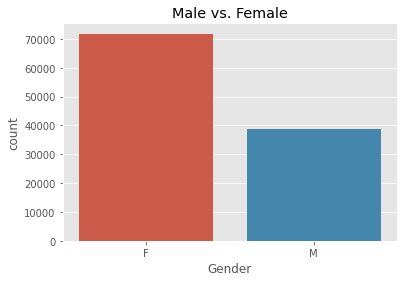

In [251]:
sns.countplot(x='Gender',
              label='Count',
              data=df)

_= plt.title("Male vs. Female")
ax.set(xlabel='Gender', 
       ylabel='Count')

F, M = df.Gender.value_counts()
print('Number of patients that are female: ', F)
print('Number of patients that are male: ', M)

There were more females than men that scheduled an appointment with a provider.

<AxesSubplot:xlabel='Gender', ylabel='count'>

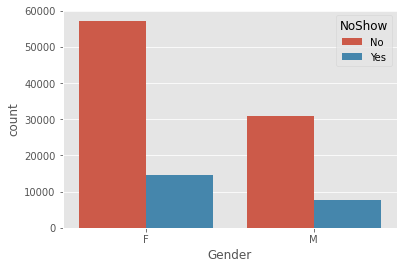

In [253]:
#Univariate analysis target.
sns.countplot(x='Gender', hue="NoShow", data=df)

<AxesSubplot:xlabel='NoShow', ylabel='count'>

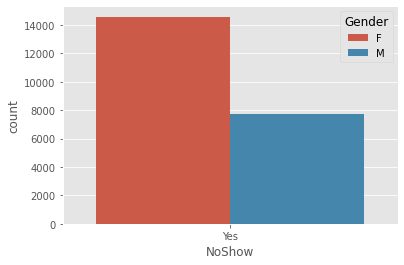

In [352]:
sns.countplot(, hue="Gender", data=df)



# Date & Time Analysis

### Scheduled Hours

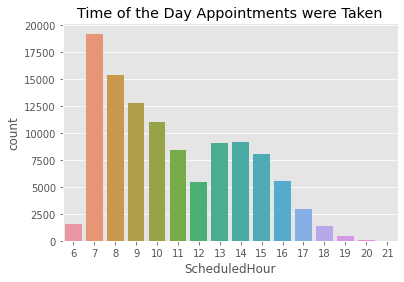

In [263]:
ax = sns.countplot(x='ScheduledHour', data=df)

_= plt.title("Time of the Day Appointments were Taken")
_= plt.show()

Most appointments were taken at 7am. 12pm was also low probably for lunch hour. The lowest were at 6am and after 5pm. 

<AxesSubplot:xlabel='ScheduledHour', ylabel='count'>

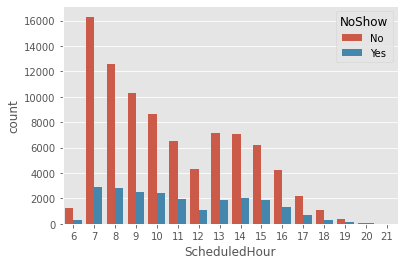

In [257]:
ax = sns.countplot(x='ScheduledHour',
              hue="NoShow", data=df)

<Figure size 1440x360 with 0 Axes>

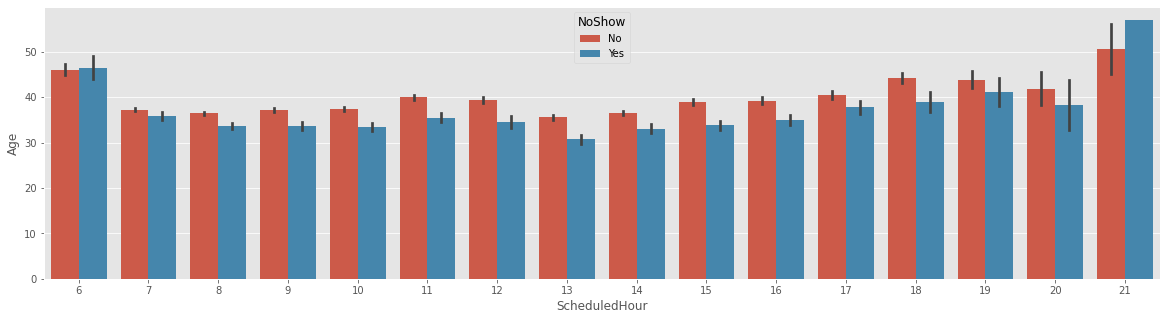

In [328]:
plt.figure(figsize=(20,5))
ax = sns.barplot(x='ScheduledHour',
                 y='Age',
              hue="NoShow", data=df)

### WaitingDays

<AxesSubplot:xlabel='WaitingDays'>

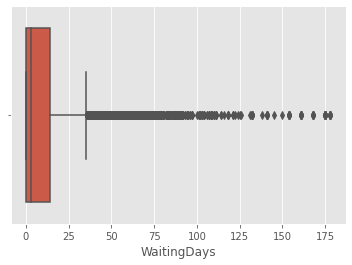

In [422]:
sns.boxplot(x="WaitingDays", data=df)

In [418]:
print(df['WaitingDays'].quantile(0.25))
print(df['WaitingDays'].quantile(0.75))

Q1 = df.quantile(0.25)

# Now get Q3 and store in a variable called Q3. 
Q3 = df.quantile(0.75)

# Now calculate the IQR, storing it in a variable called IQR.
IQR = Q3 - Q1
print(IQR)

0.0
14.0
Age              37.0
Scholarship       0.0
Hypertension      0.0
Diabetes          0.0
Alcoholism        0.0
Handicap          0.0
SMSSent           1.0
WaitingDays      14.0
ScheduledHour     5.0
dtype: float64


The WaitingDays has lots of outliers. Removing the outliers means that the observations will drop down dramatically. I'll not include waiting days in my model. 

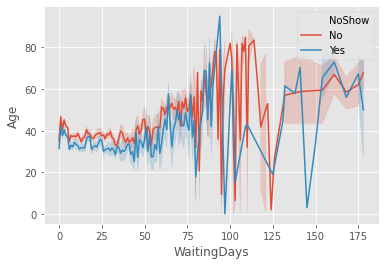

In [398]:
ax = sns.lineplot(x='WaitingDays', y='Age', hue="NoShow",data=df)

### Week Day

<AxesSubplot:xlabel='ScheduledDayWeekDay', ylabel='Age'>

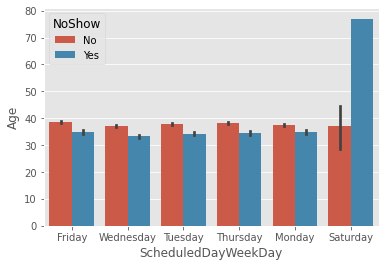

In [341]:
sns.barplot(x='ScheduledDayWeekDay',
            y='Age', 
            hue='NoShow', data=df)

<AxesSubplot:xlabel='ScheduledDayWeekDay', ylabel='count'>

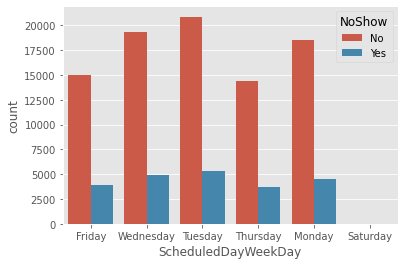

In [342]:
sns.countplot(x='ScheduledDayWeekDay',
              hue='NoShow',
              data=df)

<AxesSubplot:xlabel='ScheduledDayWeekDay', ylabel='count'>

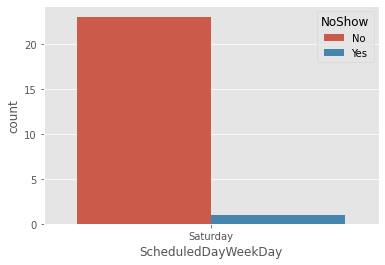

In [343]:
sns.countplot(df['ScheduledDayWeekDay'].loc[df['ScheduledDayWeekDay'] == 'Saturday'], hue="NoShow", data=df)

<AxesSubplot:xlabel='ScheduledHour', ylabel='Age'>

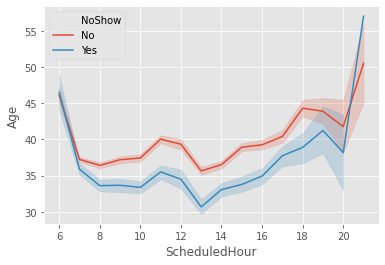

In [340]:
sns.lineplot(x="ScheduledHour", 
             y="Age",
             hue="NoShow",
             data=df)

## Do Text Reminders have an affect on NoShows?

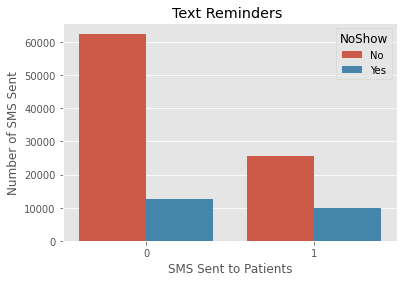

Number of patients that are female:  75036
Number of patients that are male:  35481


In [440]:
ax = sns.countplot(x='SMSSent', 
                   hue="NoShow", 
                   data=df)

_= plt.title("Text Reminders ")
_= ax.set(xlabel='SMS Sent to Patients', 
       ylabel='Number of SMS Sent')
_=plt.show()

Y, N = df.SMSSent.value_counts()
print('Number of patients that are female: ', Y)
print('Number of patients that are male: ', N)

In [448]:
df.groupby('NoShow')['SMSSent'].agg([np.mean,'count'])

mean  count
NoShow                 
No      0.291339  88203
Yes     0.438469  22314

<AxesSubplot:xlabel='SMSSent', ylabel='Age'>

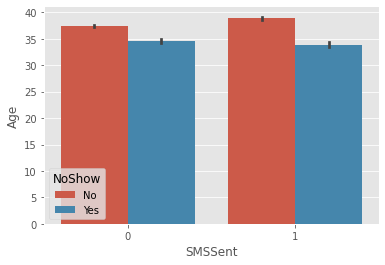

In [303]:
sns.barplot(x='SMSSent',y='Age', hue="NoShow", data=df)

<AxesSubplot:xlabel='SMSSent', ylabel='Age'>

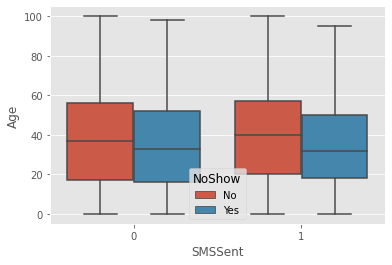

In [301]:
sns.boxplot(x='SMSSent', y='Age', hue='NoShow', data=df)

### Neighborhoods

<Figure size 1440x360 with 0 Axes>

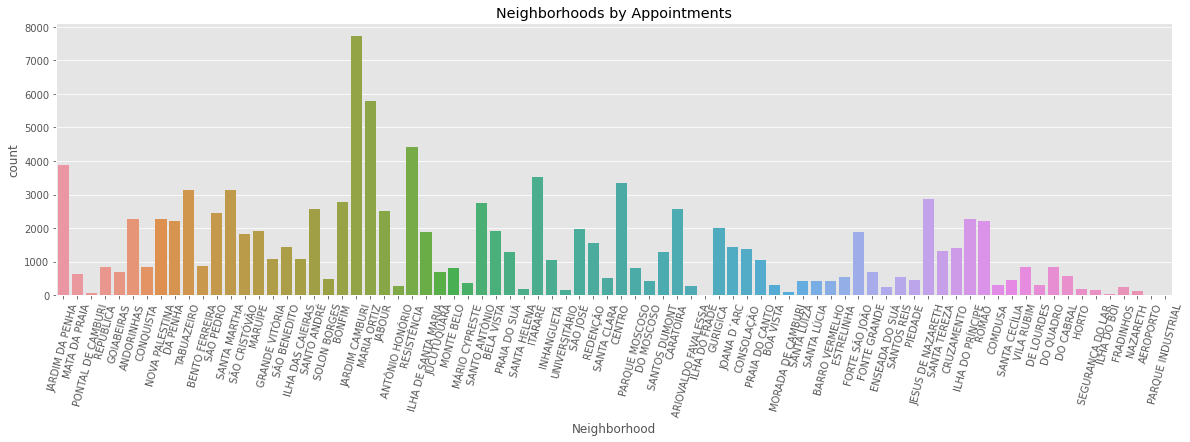

In [188]:
#sns.set_context("talk")
plt.figure(figsize=(20,5))
ax = sns.countplot(x='Neighborhood', 
                   data=df)


_= plt.title("Neighborhoods by Appointments")
#_= plt.xlabel("NeighborHoods")
#_= plt.ylabel("Count")
_= plt.xticks(rotation=75)
plt.show()

<Figure size 1440x360 with 0 Axes>

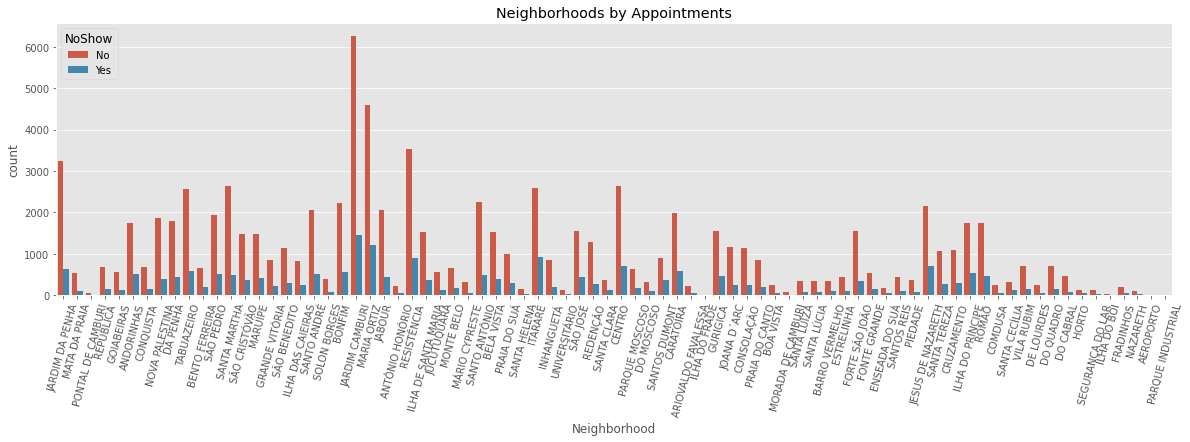

In [260]:
#sns.set_context("talk")
plt.figure(figsize=(20,5))
ax = sns.countplot(x='Neighborhood', hue="NoShow" ,
                   data=df)


_= plt.title("Neighborhoods by Appointments")
#_= plt.xlabel("NeighborHoods")
#_= plt.ylabel("Count")
_= plt.xticks(rotation=75)
plt.show()

<AxesSubplot:>

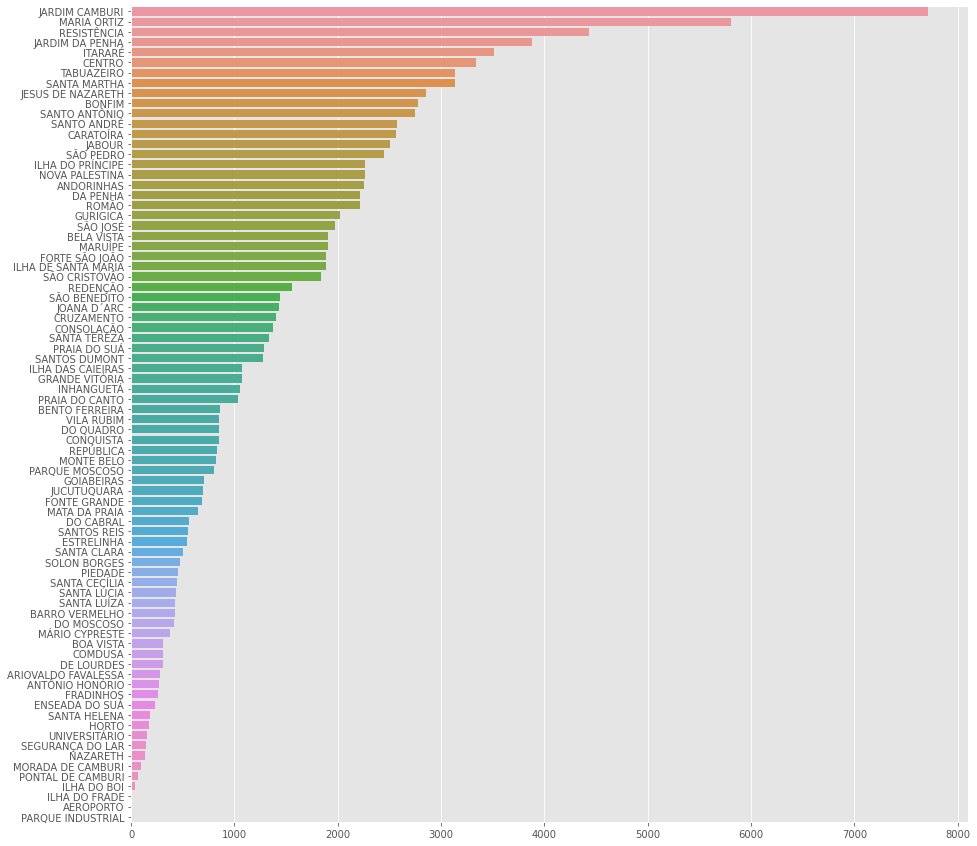

In [280]:
f, ax = plt.subplots(figsize=(15, 15))

x = pd.DataFrame(df.Neighborhood.value_counts())

names = list(x.index)

values = list(x.Neighborhood)

sns.barplot(x=values, y=names)

#### Violinplot

<AxesSubplot:xlabel='Diabetes', ylabel='Age'>

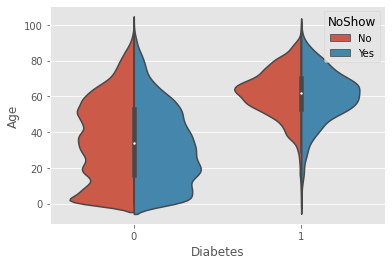

In [300]:
sns.violinplot(x='Diabetes', y='Age', hue='NoShow', split=True,data=df)

#### FactorPlot

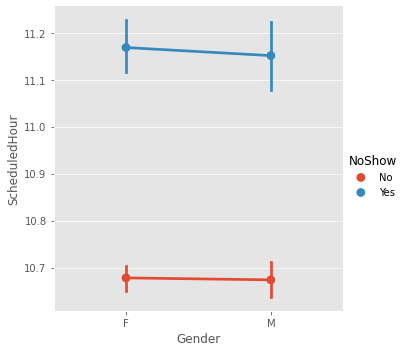

In [212]:
sns.factorplot(x="Gender", y="ScheduledHour", hue="NoShow", kind="point", data=df);

#### StripPlot

<AxesSubplot:xlabel='NoShow', ylabel='Age'>

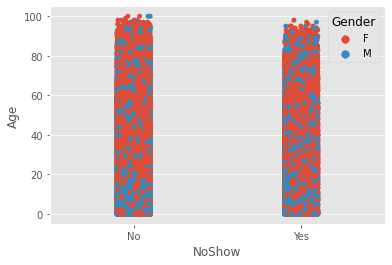

In [119]:
sns.stripplot(x="NoShow",y="Age", jitter=True, hue="Gender",data=df)

# Matrix Plots

### HeatMap

In [168]:
corr = df.corr()
corr.round(2).style.background_gradient(cmap='coolwarm')

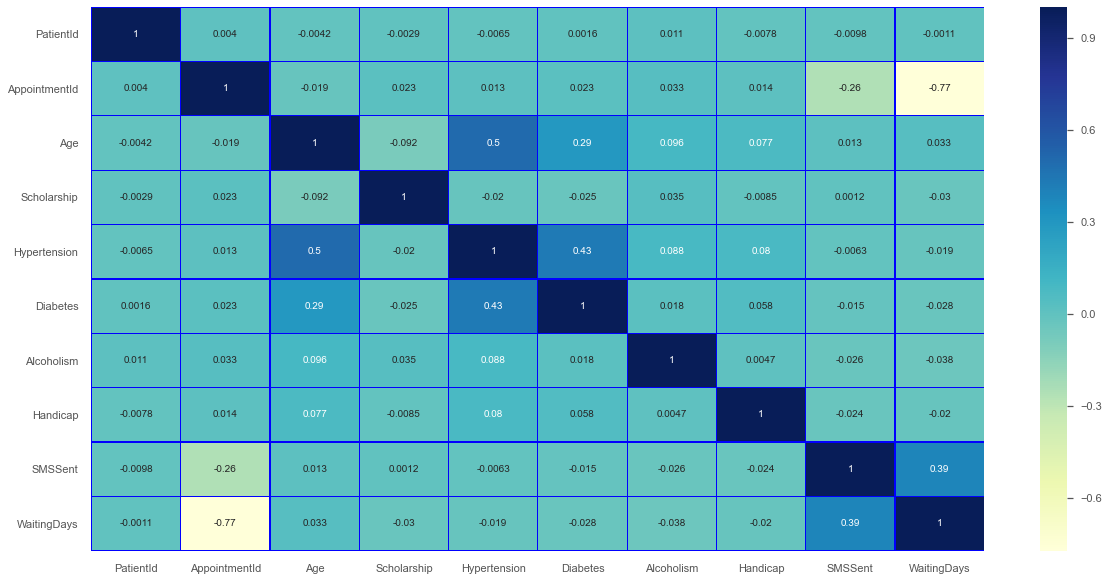

In [169]:
plt.figure(figsize=(20,10))
sns.heatmap(corr,
            linecolor='blue',linewidths=.1, 
            cmap="YlGnBu", annot=True)
plt.yticks(rotation=0);

# Grid

In [ ]:
#g = sns.PairGrid(data=df)
#g.map(plt.scatter)

In [231]:
#g = sns.FacetGrid(col='WaitingDays', row='NoShow', data=df)
#g.map(sns.distplot('Age'))

___

# PANDAS-PROFILING REPORT

In [8]:
profile = ProfileReport(df, title='Med NoShow Profiling Report')

In [9]:
profile.to_notebook_iframe()

<iframe src="https://docs.google.com/presentation/d/e/2PACX-1vRG_n3pv1uwCcaOaslah_ngGnArTsaN_CbUc1mxKv9gfEK69xRKvRf2epfd34RtSx--xp2OJXTbWWhO/embed?start=false&loop=false&delayms=3000" frameborder="0" width="960" height="569" allowfullscreen="true" mozallowfullscreen="true" webkitallowfullscreen="true"></iframe>